In [ ]:
# Import pustaka yang diperlukan
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = 'ecommerce_customer_data_custom_ratios.csv'  # Sesuaikan path jika berbeda
data = pd.read_csv(file_path)
print(data.head(), "\n")

   Customer ID        Purchase Date Product Category  Product Price  Quantity  \
0        46251  2020-09-08 09:38:32      Electronics             12         3   
1        46251  2022-03-05 12:56:35             Home            468         4   
2        46251  2022-05-23 18:18:01             Home            288         2   
3        46251  2020-11-12 13:13:29         Clothing            196         1   
4        13593  2020-11-27 17:55:11             Home            449         1   

   Total Purchase Amount Payment Method  Customer Age  Returns  \
0                    740    Credit Card            37      0.0   
1                   2739         PayPal            37      0.0   
2                   3196         PayPal            37      0.0   
3                   3509         PayPal            37      0.0   
4                   3452    Credit Card            49      0.0   

         Customer Name  Age  Gender  Churn  
0  Christine Hernandez   37    Male      0  
1  Christine Hernandez   3

**Data Cleaning**

In [ ]:
# ===== Data Cleaning =====
# Isi nilai kosong pada kolom "Returns" dengan 0 (diasumsikan tidak ada pengembalian)
data['Returns'] = data['Returns'].fillna(0)

# Hapus kolom redundan jika kolom "Customer Age" dan "Age" memiliki nilai yang sama
if (data['Customer Age'] == data['Age']).all():
    data = data.drop(columns=['Age'])

# Encode kolom kategorikal menjadi nilai numerik
label_encoders = {}
categorical_columns = ['Product Category', 'Payment Method', 'Gender']
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le
print(data.head(), "\n")

   Customer ID        Purchase Date  Product Category  Product Price  \
0        46251  2020-09-08 09:38:32                 2             12   
1        46251  2022-03-05 12:56:35                 3            468   
2        46251  2022-05-23 18:18:01                 3            288   
3        46251  2020-11-12 13:13:29                 1            196   
4        13593  2020-11-27 17:55:11                 3            449   

   Quantity  Total Purchase Amount  Payment Method  Customer Age  Returns  \
0         3                    740               1            37      0.0   
1         4                   2739               3            37      0.0   
2         2                   3196               3            37      0.0   
3         1                   3509               3            37      0.0   
4         1                   3452               1            49      0.0   

         Customer Name  Gender  Churn  
0  Christine Hernandez       1      0  
1  Christine Hernandez  

**Feature Selection**

In [ ]:
if data['Churn'].isnull().sum() > 0:
    print(f"Terdapat {data['Churn'].isnull().sum()} nilai NaN di kolom 'Churn'.")
    data = data.dropna(subset=['Churn'])
    print("Baris dengan nilai NaN pada kolom 'Churn' telah dihapus.\n")

X = data.drop(columns=['Customer ID', 'Purchase Date', 'Customer Name', 'Churn'])
y = data['Churn']
print("Fitur (X):\n", X.head())
print("Target (y):\n", y.head(), "\n")

Terdapat 1 nilai NaN di kolom 'Churn'.
Baris dengan nilai NaN pada kolom 'Churn' telah dihapus.

Fitur (X):
    Product Category  Product Price  Quantity  Total Purchase Amount  \
0                 2             12         3                    740   
1                 3            468         4                   2739   
2                 3            288         2                   3196   
3                 1            196         1                   3509   
4                 3            449         1                   3452   

   Payment Method  Customer Age  Returns   Age  Gender  
0               1            37      0.0  37.0       1  
1               3            37      0.0  37.0       1  
2               3            37      0.0  37.0       1  
3               3            37      0.0  37.0       1  
4               1            49      0.0  49.0       0  
Target (y):
 0    0.0
1    0.0
2    0.0
3    0.0
4    1.0
Name: Churn, dtype: float64 



**Split Datasets**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Dataset berhasil dibagi: {X_train.shape[0]} data pelatihan, {X_test.shape[0]} data pengujian.\n")

Dataset berhasil dibagi: 88091 data pelatihan, 22023 data pengujian.



**Model Training**

In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

**Prediction**

In [ ]:
y_pred = model.predict(X_test)
print("Contoh hasil prediksi:\n", y_pred[:10], "\n")

Contoh hasil prediksi:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 



**Evaluation**

In [ ]:
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.80      0.99      0.89     17591
         1.0       0.25      0.01      0.02      4432

    accuracy                           0.80     22023
   macro avg       0.53      0.50      0.45     22023
weighted avg       0.69      0.80      0.71     22023

Confusion Matrix:
 [[17467   124]
 [ 4390    42]]


**Visualisation**

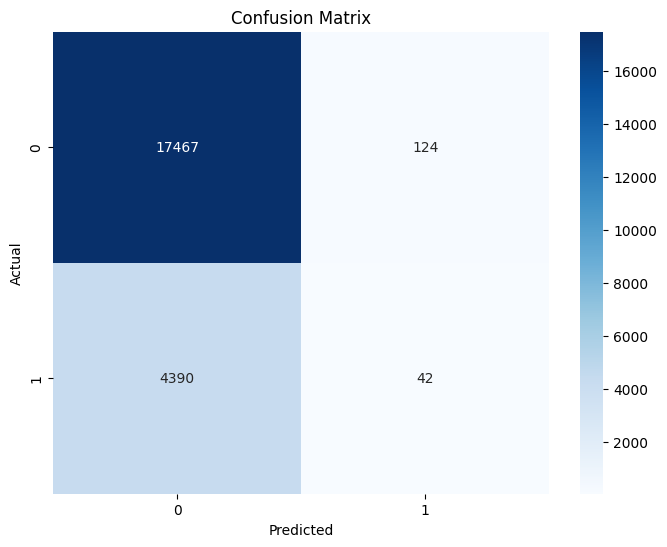

<ipython-input-12-a7f53862c4ab>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_importances.index, palette='viridis')


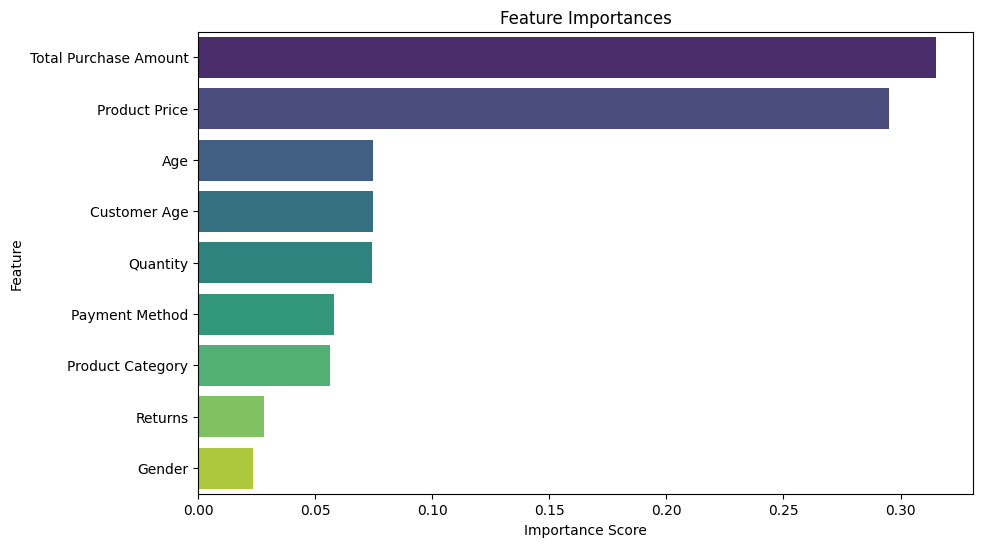

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index, palette='viridis')
plt.title('Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()